In [11]:
##import all dependencies
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import soundfile as sf
import math
from scipy import fftpack
from python_speech_features import mfcc
from scipy.signal import find_peaks, find_peaks_cwt
import Signal_Analysis.features.signal as sa
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    

In [12]:
######finding frequencies of the Audio signal
def find_freq(x):
    name=x
    x, fs = sf.read(name)
    #x= x[:3*fs]
    t= np.arange(0,len(x)/fs,1/fs)
    ###framing of sound signal
                 
    length = len(x)
    window_size = 0.4
    frame_size = int(window_size*fs)
    m=math.floor(121354/frame_size)
    x=x[1:m*frame_size]
    for i in range(1,m):
        block =x[(i-1)*frame_size+1:i*frame_size]
        fms = block.flatten()
        
        plt.subplot(2,1,1)
        plt.plot(block)
        plt.show()
        ##auto correlation
        c= signal.correlate(block,block,"same")  
        
        plt.subplot(2,1,2)
        plt.plot(c/fs)
        plt.grid(color='r', linestyle='-', linewidth=2)
        ### finding frequency
        h=sa.get_F_0(fms,fs/m)
        #print(h)
    frequency =np.mean(h)
    #print('final',frequency)
    return frequency

###### fname='/home/guttappa/s_s/White-faced Whistling Duck.wav'
#find_freq('Rufous Casiornis.wav')
#f=find_freq(fname)

In [13]:
####listing all the .wav files 

import os, fnmatch
import numpy as np
listOfFiles = os.listdir('.')  
pattern = "*.wav"  
g1=[]
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        g = entry
        g1.append(g)
        
        
num = len(g1)
print('num=',num)

num= 5


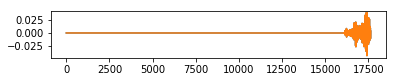

<class 'numpy.float64'> 



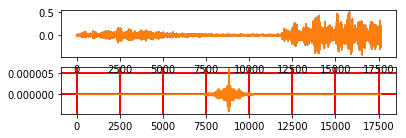

<class 'numpy.float64'> 



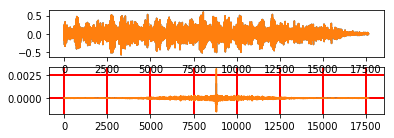

<class 'numpy.float64'> 



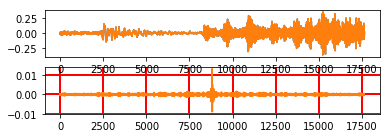

<class 'numpy.float64'> 



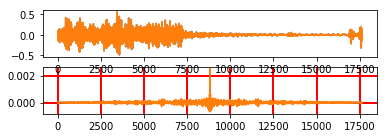

<class 'numpy.float64'> 



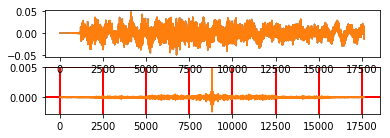

<class 'numpy.float64'> 



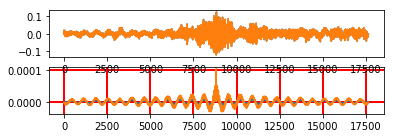

<class 'numpy.float64'> 



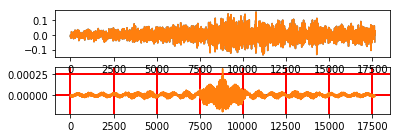

<class 'numpy.float64'> 



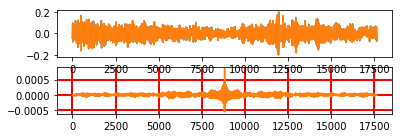

<class 'numpy.float64'> 



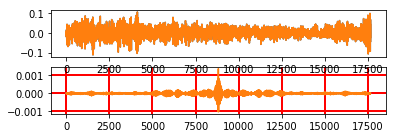

<class 'numpy.float64'> 



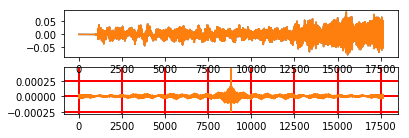

<class 'numpy.float64'> 



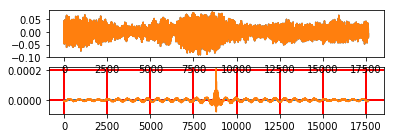

<class 'numpy.float64'> 



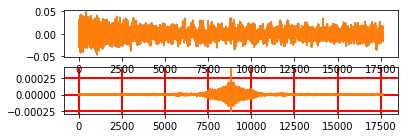

<class 'numpy.float64'> 



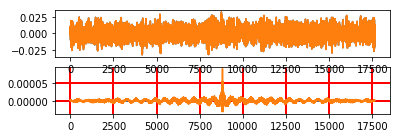

<class 'numpy.float64'> 



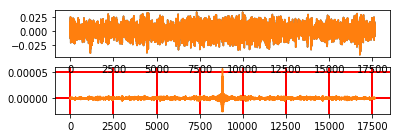

<class 'numpy.float64'> 



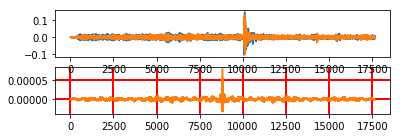

<class 'numpy.float64'> 



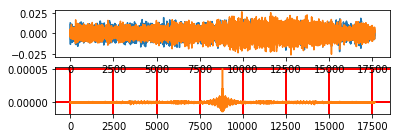

<class 'numpy.float64'> 



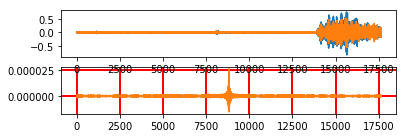

<class 'numpy.float64'> 



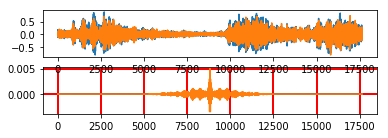

<class 'numpy.float64'> 



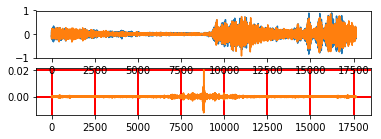

<class 'numpy.float64'> 



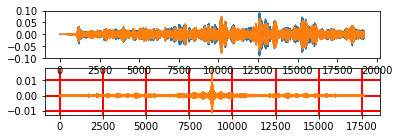

<class 'numpy.float64'> 



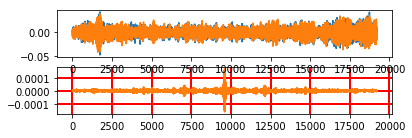

<class 'numpy.float64'> 



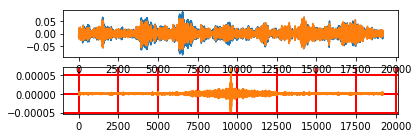

<class 'numpy.float64'> 



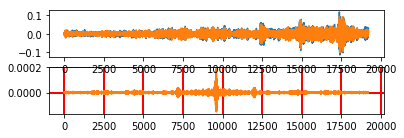

<class 'numpy.float64'> 



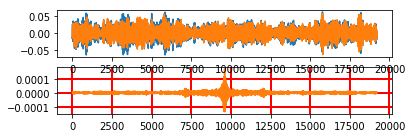

<class 'numpy.float64'> 



In [5]:
all_fq=[]
for one in g1:
    one_f=find_freq(one)
    all_fq.append(one_f)

In [14]:
all_fq

[129.91071428571428,
 125.43103448275859,
 382.8947368421052,
 196.62162162162159,
 96.03658536585364]

In [15]:
g1

['Oilbird .wav',
 'Red-browed Amazon .wav',
 'White-faced Whistling Duck.wav',
 'Short-tailed Parrot .wav',
 'White-throated Nightjar .wav']

In [8]:
######time domain features
#####1:short-time energies
def find_STE(x):
    name=x
    x, fs = sf.read(name)
    sampsPerMilli = int(fs / 1000)
    millisPerFrame = 20
    sampsPerFrame = sampsPerMilli * millisPerFrame
    nFrames = int(len(x) / sampsPerFrame) 
    STEs = []                                      # list of short-time energies
    for k in range(nFrames):
        startIdx = k * sampsPerFrame
        stopIdx = startIdx + sampsPerFrame
        window = np.zeros(len(x))
        window[startIdx:stopIdx] = 1               # rectangular window
        STE = sum((x[:,0] ** 2) * (window ** 2))
        STEs.append(STE)
    '''
    plt.plot(STE)
    plt.show()
    plt.title('Short-Time Energy')
    plt.ylabel('ENERGY')
    plt.xlabel('FRAME')
    '''
   
    
    print('final',STE)
    return STE




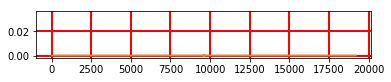

final 0.035616171546280384


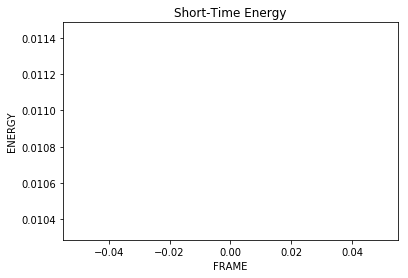

final 0.010886178351938725


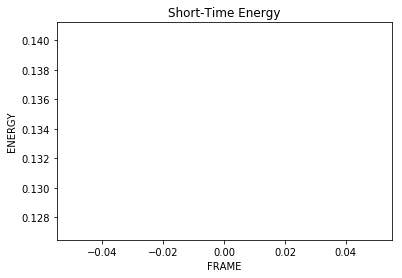

final 0.1338459551334381


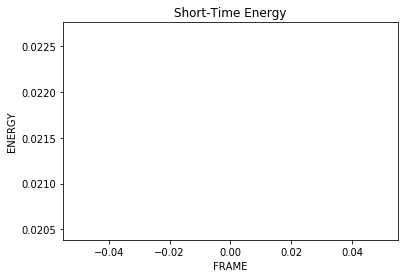

final 0.021573440171778202


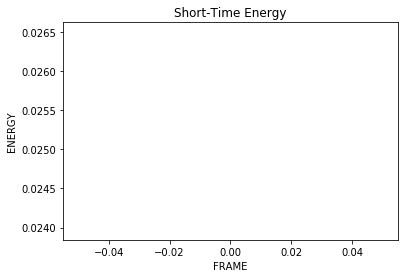

final 0.02523237094283104


In [9]:
all_STE=[]
for two in g1:
    one_f=find_STE(two)
    all_STE.append(one_f)

In [16]:
all_STE

[0.035616171546280384,
 0.010886178351938725,
 0.1338459551334381,
 0.021573440171778202,
 0.02523237094283104]

In [17]:
####zero crossing 
def find_ZCR(x):
    name=x
    x, fs = sf.read(name)
    DC = np.mean(x)
    newSignal = x - DC 
   
    sampsPerMilli = int(fs / 1000)
    millisPerFrame = 20
    sampsPerFrame = sampsPerMilli * millisPerFrame
    nFrames = int(len(x) / sampsPerFrame)        # number of non-overlapping _full_ frames
    ZCCs = []                                      # list of short-time zero crossing counts
    for i in range(nFrames):
        startIdx = i * sampsPerFrame
        stopIdx = startIdx + sampsPerFrame
        s = newSignal[startIdx:stopIdx]            # /s/ is the frame, named to correspond to the equation
        ZCC = 0
        for k in range(1, len(s)):
            ZCC += 0.5 * abs((s[k]) - (s[k - 1]))
        ZCCs.append(ZCC)
        
    plt.plot(ZCCs)
    plt.title('Short-Time Zero Crossing Counts')
    plt.ylabel('ZCC')
    plt.xlabel('FRAME')
    plt.show()
    print('final',ZCC)
    return ZCC


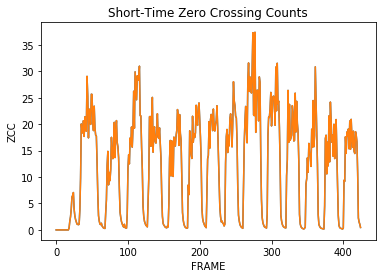

final [0.46646118 0.46646118]


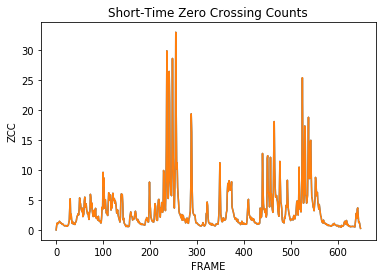

final [0.27203369 0.27203369]


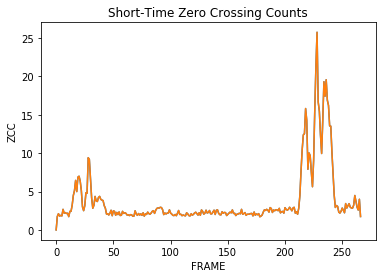

final [1.75100708 1.75100708]


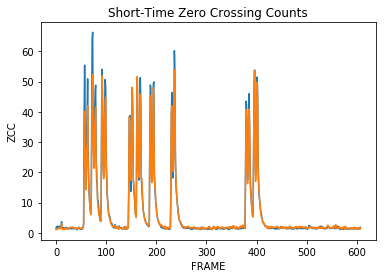

final [1.8079834  1.56582642]


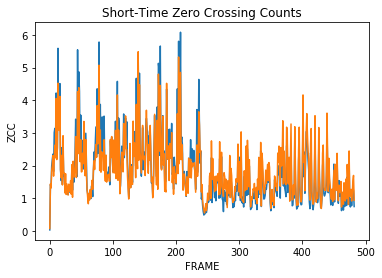

final [0.74917603 0.94148254]


In [18]:
all_ZCR=[]
for three in g1:
    one_f=find_ZCR(three)
    all_ZCR.append(one_f)

In [23]:
k=np.array(all_ZCR)
d1=k[:,0]
d2=k[:,1]
print(d1)
print(d2)

[0.46646118 0.27203369 1.75100708 1.8079834  0.74917603]
[0.46646118 0.27203369 1.75100708 1.56582642 0.94148254]


In [24]:
####Average Magnitude Difference Function
def find_AMDF(x):
    name=x
    x, fs = sf.read(name)
    Ds = [] 
    N = len(x)
    for k in range(0, 10):
        D = 0
        for n in range(k, N):
            D += abs(x[n] - x[n - k])
        D *= 1 / N
        Y = np.mean(D)
        Ds.append(Y)
        '''
    plt.plot(Ds)
    plt.title('Average Magnitude Difference Function of Frame')
    plt.ylabel('D')
    plt.xlabel('DELAY INDEX')
    '''
    print('final',Y)
    return Y
    
    



In [25]:
all_AMDF=[]
for four in g1:
    one_f=find_AMDF(four)
    all_AMDF.append(one_f)

final 0.08821601949186407
final 0.04651669455992411
final 0.01245893008828423
final 0.0436370057107178
final 0.014740541614314758


In [406]:
all_AMDF

[0.08821601949186407,
 0.04651669455992411,
 0.01245893008828423,
 0.0436370057107178,
 0.014740541614314758]

In [32]:
###creating data frame using pandas

import pandas as pd
df=pd.DataFrame({'Bird_name':g1, 'frequency':all_fq, 'short_time_energies':all_STE,
                 'zero_crossing_counts1':d1,'zero_crossing_counts2':d2,'cMDF':all_AMDF})

In [33]:
df

,Bird_name,cMDF,frequency,short_time_energies,zero_crossing_counts1,zero_crossing_counts2
0,Oilbird .wav,0.088216,129.910714,0.035616,0.466461,0.466461
1,Red-browed Amazon .wav,0.046517,125.431034,0.010886,0.272034,0.272034
2,White-faced Whistling Duck.wav,0.012459,382.894737,0.133846,1.751007,1.751007
3,Short-tailed Parrot .wav,0.043637,196.621622,0.021573,1.807983,1.565826
4,White-throated Nightjar .wav,0.014741,96.036585,0.025232,0.749176,0.941483


In [28]:
######classification using SVM
import sklearn

X = df.drop('Bird_name', axis=1)  
y = df['Bird_name']

In [29]:
X

,AMDF,frequency,short_time_energies,zero_crossing_counts1,zero_crossing_counts2
0,0.088216,129.910714,0.035616,0.466461,0.466461
1,0.046517,125.431034,0.010886,0.272034,0.272034
2,0.012459,382.894737,0.133846,1.751007,1.751007
3,0.043637,196.621622,0.021573,1.807983,1.565826
4,0.014741,96.036585,0.025232,0.749176,0.941483


In [30]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
y_pred = svclassifier.predict(X)  
y_pred

array(['Oilbird .wav', 'Red-browed Amazon .wav',
       'White-faced Whistling Duck.wav', 'Short-tailed Parrot .wav',
       'White-throated Nightjar .wav'], dtype=object)

In [34]:
####predicting
x1=np.array([[0.088216 ,129.910714 ,0.035616 ,0.466461,0.466461]])
svclassifier.predict(x1)

array(['Oilbird .wav'], dtype=object)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y,y))  
print(classification_report(y,y))

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
                                precision    recall  f1-score   support

                  Oilbird .wav       1.00      1.00      1.00         1
        Red-browed Amazon .wav       1.00      1.00      1.00         1
      Short-tailed Parrot .wav       1.00      1.00      1.00         1
White-faced Whistling Duck.wav       1.00      1.00      1.00         1
  White-throated Nightjar .wav       1.00      1.00      1.00         1

                     micro avg       1.00      1.00      1.00         5
                     macro avg       1.00      1.00      1.00         5
                  weighted avg       1.00      1.00      1.00         5



In [ ]:
#############frequency domain

In [87]:
import librosa
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import librosa.display
def find_mfcc(x):
    name=x
    x, fs = sf.read(name)
    x= x[:,0]
    mfccs = librosa.feature.mfcc(x,fs)
    plt.imshow(mfccs)
    U = np.mean(-mfccs)
    plt.show()
    
    print (mfccs.shape)
    print(U)
    return U

UnboundLocalError: local variable 'aspect_scale_mode' referenced before assignment

<Figure size 432x288 with 1 Axes>

(20, 732)
9.865769837571825


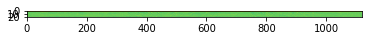

(20, 1119)
8.427423204056787


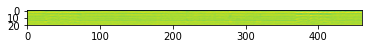

(20, 460)
12.588108533849763


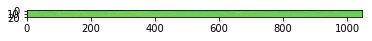

(20, 1046)
26.435665801427998


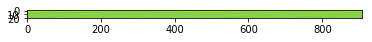

(20, 907)
15.882431325360576


In [88]:
all_MFCC=[]
for one in g1:
    one_f=find_mfcc(one)
    all_MFCC.append(one_f)

In [89]:
all_MFCC

[9.865769837571825,
 8.427423204056787,
 12.588108533849763,
 26.435665801427998,
 15.882431325360576]

In [90]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
def wav_to_input( wav_file_name ):
    input_data, f_s = sf.read(wav_file_name)
    # mfcc_feat = MFCC_input(mfcc(input_data,f_s))
    mfcc_feat = mfcc(input_data,f_s)
    #Delta features
    delta_feat = mfcc_feat[:-1]-mfcc_feat[1:]
    #Delta-Delta features
    deltadelta_feat = delta_feat[:-1]-delta_feat[1:]

    #Removing the first two frames
    mfcc_feat = mfcc_feat[2:]
    delta_feat = delta_feat[1:]

    #Concatenating mfcc, delta and delta-delta features
    full_input = np.concatenate((mfcc_feat,delta_feat,deltadelta_feat), axis=1)
    u = np.mean(-full_input)
    print(u)
    return u

In [91]:
all_MFCC=[]
for one in g1:
    one_f=wav_to_input(one)
    all_MFCC.append(one_f)

1.9667420320400557


1.7754545721565753
2.0207892398442957


2.110402321035889
1.6518641545778523


In [92]:
all_MFCC

[1.9667420320400557,
 1.7754545721565753,
 2.0207892398442957,
 2.110402321035889,
 1.6518641545778523]

In [73]:
def spectral_centroid(x,n_fft=2048, hop_length=1024):
    name=x
    x, fs = sf.read(name)
    x= x[:,0]
    Dy=[]
    cent = librosa.feature.spectral_centroid(x,fs/5)
    H=np.mean(cent)/5
    S, phase = librosa.magphase(librosa.stft(x))
    librosa.feature.spectral_centroid(S=S)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogy(cent.T, label='Spectral centroid')
    plt.show()
    plt.ylabel('Hz')
    plt.xticks([])
    plt.xlim([0, cent.shape[-1]])
    plt.legend()
    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                                 y_axis='log', x_axis='time')
    plt.title('log Power spectrogram')
    plt.tight_layout()
    Dy.append(H)
    print(H)
    
    return H

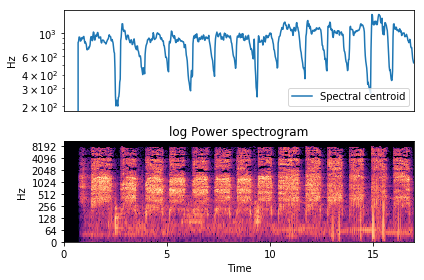

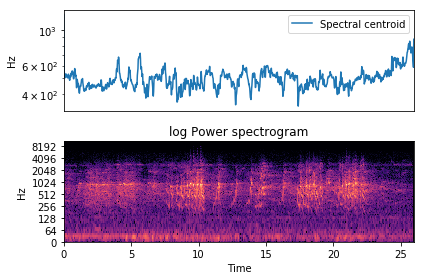

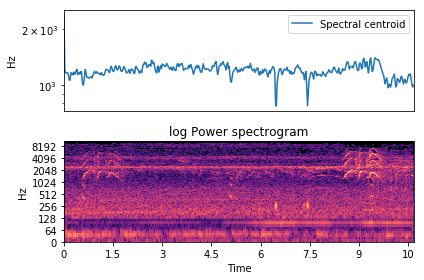

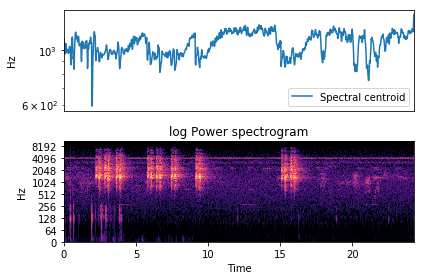

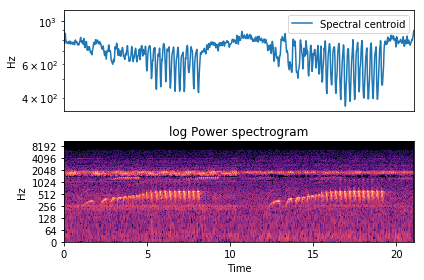

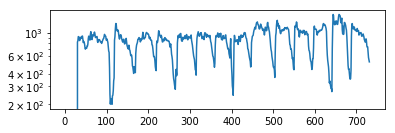

165.74557315511788


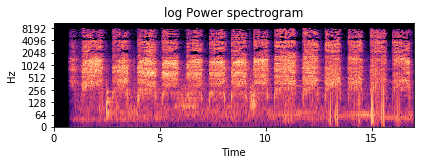

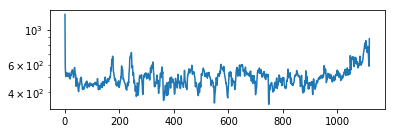

99.95096525569174


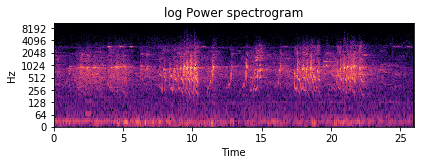

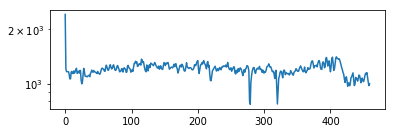

239.950190379847


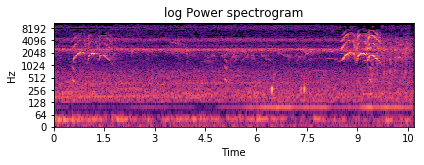

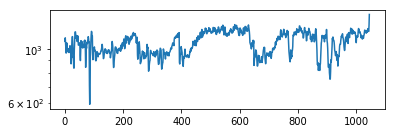

212.55503420271285


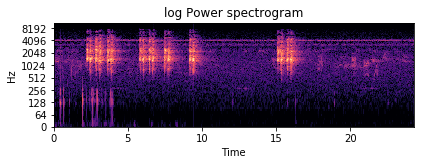

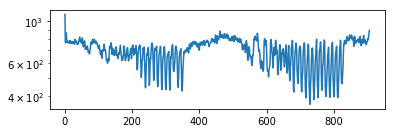

138.42241104965083


In [74]:
all_SC=[]
for one in g1:
    one_f=spectral_centroid(one)
    all_SC.append(one_f)

In [48]:
all_SC

[165.74557315511788,
 99.95096525569174,
 239.950190379847,
 212.55503420271285,
 138.42241104965083]

In [85]:
def spctral_bw(x,n_fft=2048, hop_length=1024):
    name=x
    x, fs = sf.read(name)
    x= x[:,0]
    Dy=[]
    spec_bw = librosa.feature.spectral_bandwidth(x,fs/5)
    S, phase = librosa.magphase(librosa.stft(x))
    librosa.feature.spectral_bandwidth(S=S)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogy(spec_bw.T, label='Spectral_bandwidth')
    plt.show()
    plt.ylabel('Hz')
    plt.xticks([])
    plt.xlim([0, spec_bw.shape[-1]])
    plt.legend()
    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                                 y_axis='log', x_axis='time')
   
    plt.title('log Power spectrogram')
    plt.tight_layout()
    H=np.mean(spec_bw)/5
    Dy.append(H)
    print(H)
    
    return H

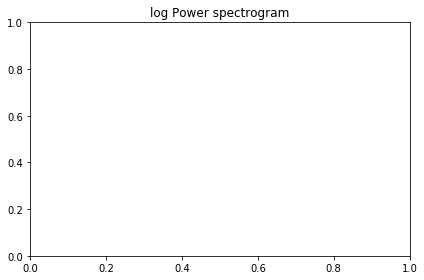

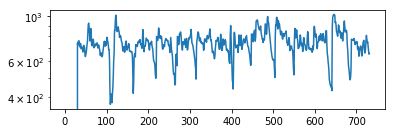

141.2344319856873


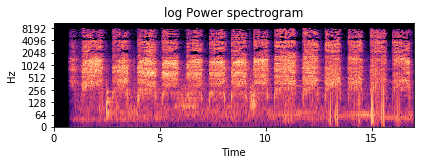

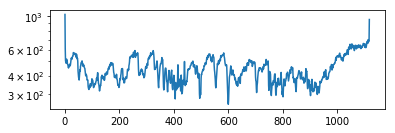

88.88027733723867


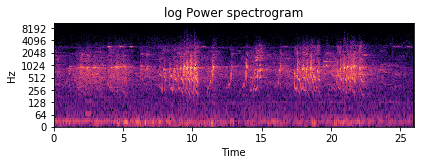

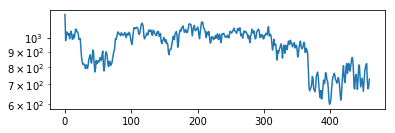

186.92577785999114


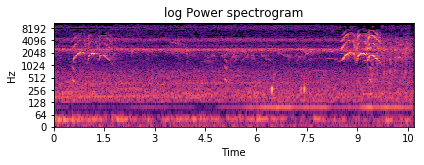

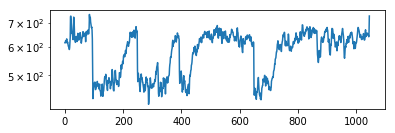

116.63558407626049


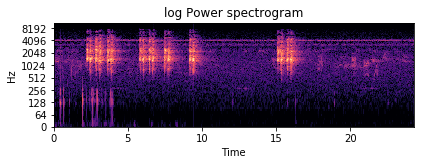

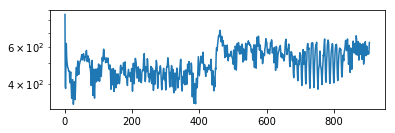

101.12281832766524


In [86]:
all_sb=[]
for one in g1:
    one_f=spctral_bw(one)
    all_sb.append(one_f)

In [51]:
all_sb

[141.2344319856873,
 88.88027733723867,
 186.92577785999114,
 116.63558407626049,
 101.12281832766524]

In [52]:
def spctral_roff(x,n_fft=2048, hop_length=1024):
    name=x
    x, fs = sf.read(name)
    x= x[:,0]
    Dy=[]
    cent = librosa.feature.spectral_rolloff(x,fs/5)
    H=np.mean(cent)/5
    Dy.append(H)
    print(H)
    
    return H

In [53]:
all_sof=[]
for one in g1:
    one_f=spctral_roff(one)
    all_sof.append(one_f)

319.8280769723361
173.05767740449062
423.0225840692935
327.5928948076004
199.72367695700112


In [54]:
all_sof

[319.8280769723361,
 173.05767740449062,
 423.0225840692935,
 327.5928948076004,
 199.72367695700112]

In [55]:
def spctral_flat(x,n_fft=2048, hop_length=1024):
    name=x
    x, fs = sf.read(name)
    x= x[:,0]
    Dy=[]
    cent = librosa.feature.spectral_flatness(x)
    H=np.mean(cent)
    Dy.append(H)
    print(H)
    
    return H

In [56]:
all_sf=[]
for one in g1:
    one_f=spctral_flat(one)
    all_sf.append(one_f)

0.042077582
0.00051796215
0.017259456
0.0028401045
0.0004445965


In [57]:
all_sf

[0.042077582, 0.00051796215, 0.017259456, 0.0028401045, 0.0004445965]

In [93]:
##creating a data frame
import pandas as pd
df=pd.DataFrame({'Bird_name':g1, 'MFCC':all_MFCC, 'spectral_centroid':all_SC, 'spectral_bandwidth':all_sb,
                'spectral_roll0ff':all_sof, 'spectral_flatness':all_sf})

In [94]:
df

,Bird_name,MFCC,spectral_bandwidth,spectral_centroid,spectral_flatness,spectral_roll0ff
0,Oilbird .wav,1.966742,141.234432,165.745573,0.042078,319.828077
1,Red-browed Amazon .wav,1.775455,88.880277,99.950965,0.000518,173.057677
2,White-faced Whistling Duck.wav,2.020789,186.925778,239.950190,0.017259,423.022584
3,Short-tailed Parrot .wav,2.110402,116.635584,212.555034,0.002840,327.592895
4,White-throated Nightjar .wav,1.651864,101.122818,138.422411,0.000445,199.723677


In [95]:
#####Classification
import sklearn

X = df.drop('Bird_name', axis=1)  
y = df['Bird_name']

In [96]:
X


,MFCC,spectral_bandwidth,spectral_centroid,spectral_flatness,spectral_roll0ff
0,1.966742,141.234432,165.745573,0.042078,319.828077
1,1.775455,88.880277,99.950965,0.000518,173.057677
2,2.020789,186.925778,239.950190,0.017259,423.022584
3,2.110402,116.635584,212.555034,0.002840,327.592895
4,1.651864,101.122818,138.422411,0.000445,199.723677


In [97]:
y

0                      Oilbird .wav
1            Red-browed Amazon .wav
2    White-faced Whistling Duck.wav
3          Short-tailed Parrot .wav
4      White-throated Nightjar .wav
Name: Bird_name, dtype: object

In [98]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [99]:
y_pred = svclassifier.predict(X)  
y_pred

array(['Oilbird .wav', 'Red-browed Amazon .wav',
       'White-faced Whistling Duck.wav', 'Short-tailed Parrot .wav',
       'White-throated Nightjar .wav'], dtype=object)

In [100]:
y

0                      Oilbird .wav
1            Red-browed Amazon .wav
2    White-faced Whistling Duck.wav
3          Short-tailed Parrot .wav
4      White-throated Nightjar .wav
Name: Bird_name, dtype: object

In [101]:
x1=np.array([[1.775455 ,88.880277 ,99.950965 ,0.000518,173.057677]])
svclassifier.predict(x1)

array(['Red-browed Amazon .wav'], dtype=object)

In [67]:
np.shape(x1)

(1, 5)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y,y))  
print(classification_report(y,y))

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
                                precision    recall  f1-score   support

                  Oilbird .wav       1.00      1.00      1.00         1
        Red-browed Amazon .wav       1.00      1.00      1.00         1
      Short-tailed Parrot .wav       1.00      1.00      1.00         1
White-faced Whistling Duck.wav       1.00      1.00      1.00         1
  White-throated Nightjar .wav       1.00      1.00      1.00         1

                     micro avg       1.00      1.00      1.00         5
                     macro avg       1.00      1.00      1.00         5
                  weighted avg       1.00      1.00      1.00         5

